In [ ]:
import sys
sys.path.append("../")

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np
import math
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from delay.delay import *
import delay.calculator as calc
from delay.strategy import fA_HardSkewTo0, fB_HardSkewTo0, showIntervalFunctions

In [13]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [18]:
def modelFunctions(N, d = 20):    
    def fA(x):
        return N/2 if x <= d else (-N/2*x+(N/2)*(N/2))/(N/2-d)

    def fB(x):
        return N/2 if x >= -d else (N/2*x+(N/2)*(N/2))/(N/2-d)
    
    return (fA, fB)

def simulate():
    def nextElem(func):
        term = -N/2 if func == max else N/2
        rc = calculateValue(previousA, previousB)
        value = -rc if func == max else rc
        return func(x[current] + value, term)
    
    current = len(x)-1
    for _ in range(0, duration):
        previousA, previousB = fA(x[current - tauA]), fB(x[current - tauB])
        
        prob = calculateProbability(previousA - previousB)
        r = random.random()
        if r < prob:
            nextElement = nextElem(min) # +1
        else:
            nextElement = nextElem(max) # -1
                
        x.append(nextElement)
        current += 1

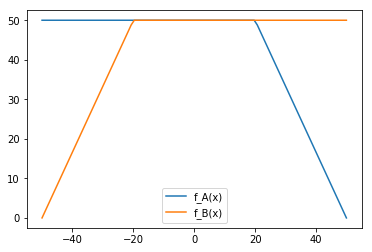

In [19]:
showIntervalFunctions(fA_HardSkewTo0, fB_HardSkewTo0, 100)

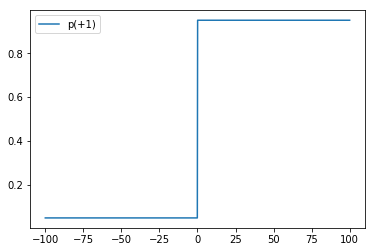

In [20]:
calculateProbability = calc.stepWithoutInterval(100)

N = 100
x = np.linspace(-N, N, num=1000)

y = []
for xx in x:
    y.append(calculateProbability(xx))

plt.plot(x, y, label='p(+1)')

plt.legend()
plt.show()

µ =  -0.10312100445034099


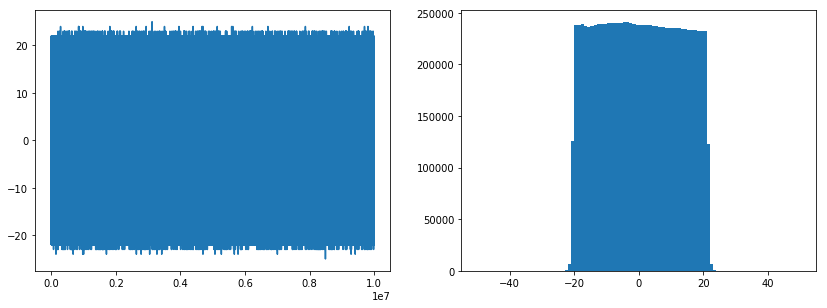

In [21]:
N = 100
tauA = 0
tauB = 0
x = [0] * 20 + [1] 
duration = 100000 * N
conv = N

simulate()
            
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.8))
ax1.plot(x)
(bins, _, _) = ax2.hist(x[100*conv:], bins=np.linspace(-N/2, N/2, N+1))
print('µ = ', np.mean(x[100*conv:]))

µ =  -2.8405717065059224


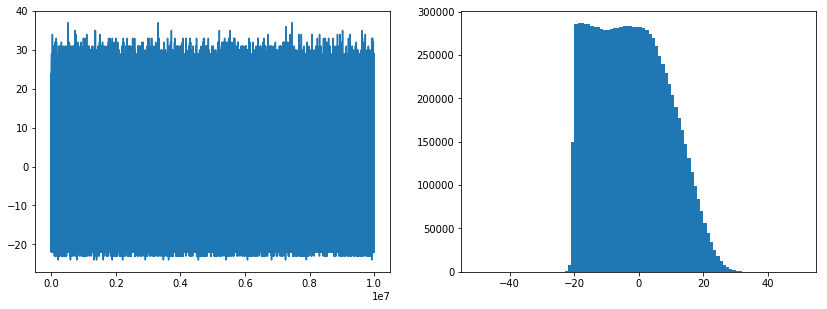

In [22]:
N = 100
tauA = 20
tauB = 0
x = [0] * 20 + [1] 
duration = 100000 * N
conv = N

simulate()
            
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.8))
ax1.plot(x)
(bins, _, _) = ax2.hist(x[100*conv:], bins=np.linspace(-N/2, N/2, N+1));
print('µ = ', np.mean(x[100*conv:]))

µ =  2.8411799134356173


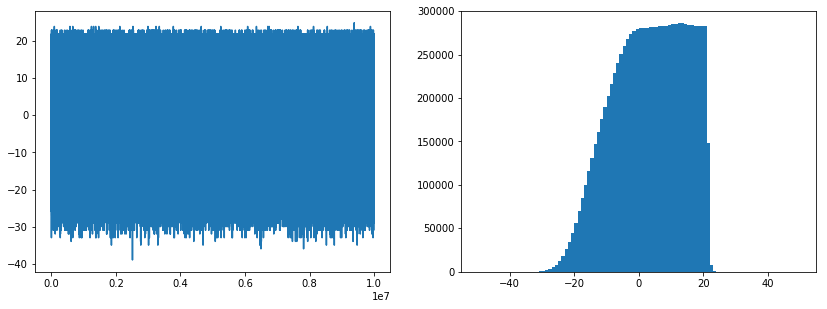

In [23]:
N = 100
tauA = 0
tauB = 20
x = [0] * 20 + [1] 
duration = 100000 * N
conv = N

simulate()
            
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.8))
ax1.plot(x)
(bins, _, _) = ax2.hist(x[100*conv:], bins=np.linspace(-N/2, N/2, N+1))
print('µ = ', np.mean(x[100*conv:]))

d, τ, µ
10 ,  0 ,  -0.04070599486431618
10 ,  10 ,  -1.376798993323491
10 ,  20 ,  -2.179129620411245
10 ,  30 ,  -2.22012039718117
10 ,  40 ,  -2.1551070404593506
10 ,  50 ,  -2.0974143304457082
10 ,  60 ,  -2.031359542811429
10 ,  70 ,  -1.9843385967769496
10 ,  80 ,  -1.915926876014567
10 ,  90 ,  -1.8613334339662833
10 ,  100 ,  -1.806796748100945


Mean squared error: 0.28
Variance score: 0.20
Line: -0.01x + -1.361563


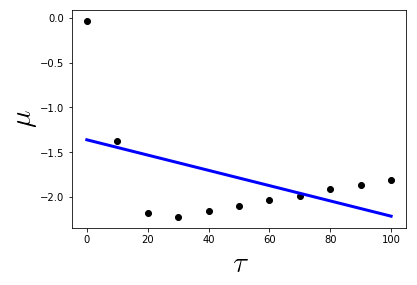

In [30]:
N = 100
tauA = 0
tauB = 0
x = [0] * 100 + [1] 
duration = 100000 * N
conv = N
d = 10
(fA, fB) = modelFunctions(N, d = d)

taus = []
mus = []

print('d, τ, µ')
for i in range(0, 11):
    x = x[:101]
    tauA = i * 10
    calculateProbability = calc.stepWithoutInterval(N, w = 0.99)
    simulate()
    mean = np.mean(x[100*conv:])
    print(d, ', ', tauA, ', ', mean)
    taus.append(tauA)
    mus.append(mean)
    
print('\n')

taus = np.array(taus).reshape(-1,1)
regr.fit(taus, mus)
mus_pred = regr.predict(taus)
print("Mean squared error: %.2f" % mean_squared_error(mus, mus_pred))
print('Variance score: %.2f' % r2_score(mus, mus_pred))
plt.scatter(taus, mus,  color='black')
plt.plot(taus, mus_pred, color='blue', linewidth=3)
print('Line: ' + '%.2fx + %f' % (regr.coef_, regr.intercept_))
plt.ylabel(r'$\mu$', usetex=True, fontsize=30)
plt.xlabel(r'$\tau$', usetex=True, fontsize=30);

0 ,  50 ,  0.06588869341113066
2 ,  50 ,  -0.04212149578785042
4 ,  50 ,  -0.4076520592347941
6 ,  50 ,  -0.904353009564699
8 ,  50 ,  -1.4742005525799446
10 ,  50 ,  -2.1104770889522912
12 ,  50 ,  -2.694456630554337
14 ,  50 ,  -3.310144968985503
16 ,  50 ,  -3.924109707589029
18 ,  50 ,  -4.404553259544674
20 ,  50 ,  -4.949000705099929
22 ,  50 ,  -5.414000158599984
24 ,  50 ,  -5.822824517717549
26 ,  50 ,  -6.413893658610634
28 ,  50 ,  -6.864206413579359
30 ,  50 ,  -6.95436220456378
32 ,  50 ,  -7.2725071727492825
34 ,  50 ,  -7.0169639983036
36 ,  50 ,  -7.055510094448991
38 ,  50 ,  -7.565763843423616
40 ,  50 ,  -7.367001563299843
42 ,  50 ,  -8.00023389997661
44 ,  50 ,  -7.501632549836745
46 ,  50 ,  -7.0037678996232104
47 ,  50 ,  -6.057084394291561
48 ,  50 ,  -5.9499520050048
49 ,  50 ,  -3.338619666138033
50 ,  50 ,  -0.6313179368682064
52 ,  50 ,  -0.43441105655889434
54 ,  50 ,  -0.3717764628223537
56 ,  50 ,  -0.30374626962537304
58 ,  50 ,  0.6767853323214668
60 , 

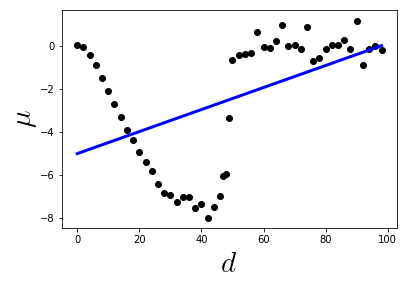

In [31]:
N = 100
tauA = 0
tauB = 0
x = [0] * 100 + [1] 
duration = 100000 * N
conv = N

ds = []
mus = []

tauA = 50
testIntervals = np.array(list(range(0, 50)))
testIntervals *= 2
testIntervals = np.sort(np.append(testIntervals, [47,49]))
for d in testIntervals:
    x = x[:101]
    calculateProbability = calc.stepWithoutInterval(N, w = 0.99)
    (fA, fB) = modelFunctions(N, d = d)
    simulate()
    mean = np.mean(x[1*conv:])
    print(d, ', ', tauA, ', ', mean)
    ds.append(d)
    mus.append(mean)
    
print('\n')

ds = np.array(ds).reshape(-1,1)
regr.fit(ds, mus)
mus_pred = regr.predict(ds)
print("Mean squared error: %.2f" % mean_squared_error(mus, mus_pred))
print('Variance score: %.2f' % r2_score(mus, mus_pred))
plt.scatter(ds, mus,  color='black')
plt.plot(ds, mus_pred, color='blue', linewidth=3)
print('Line: ' + '%.2fx + %f' % (regr.coef_, regr.intercept_))
plt.ylabel(r'$\mu$', usetex=True, fontsize=30)
plt.xlabel(r'$d$', usetex=True, fontsize=30);

0 ,  150 ,  0.04629002249326608
2 ,  150 ,  -0.03997036666596264
4 ,  150 ,  -0.2659655793269758
6 ,  150 ,  -0.6150492372399439
8 ,  150 ,  -1.079363862287278
10 ,  150 ,  -1.5964133896143793
12 ,  150 ,  -2.1765089261860315
14 ,  150 ,  -2.849642961567656
16 ,  150 ,  -3.4384347065159804
18 ,  150 ,  -4.135784312891331
20 ,  150 ,  -4.707879630045782


Mean squared error: 0.07
Variance score: 0.97
Line: -0.25x + 0.614564


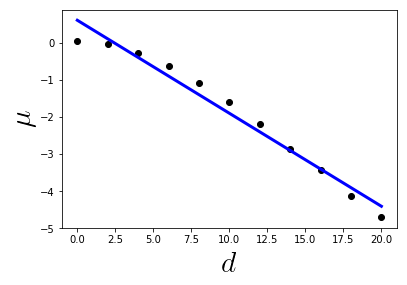

In [34]:
N = 100
tauA = 0
tauB = 0
x = [0] * 100 + [1] 
duration = 100000 * N
conv = N

ds = []
musOfD = []

tauA = 150
for i in range(0, 11):
    x = x[:101]
    d = i * 2
    (fA, fB) = modelFunctions(N, d = d)
    calculateProbability = calc.stepWithoutInterval(N, w = 0.99)
    simulate()
    mean = np.mean(x[100*conv:])
    print(d, ', ', tauA, ', ', mean)
    ds.append(d)
    musOfD.append(mean)

print('\n')

ds = np.array(ds).reshape(-1,1)
regr.fit(ds, musOfD)
mus_pred = regr.predict(ds)
print("Mean squared error: %.2f" % mean_squared_error(musOfD, mus_pred))
print('Variance score: %.2f' % r2_score(musOfD, mus_pred))
plt.scatter(ds, musOfD,  color='black')
plt.plot(ds, mus_pred, color='blue', linewidth=3)
print('Line: ' + '%.2fx + %f' % (regr.coef_, regr.intercept_))
plt.ylabel(r'$\mu$', usetex=True, fontsize=30)
plt.xlabel(r'$d$', usetex=True, fontsize=30);

d, τ, µ
20 ,  0 ,  -0.03757234141393738
20 ,  10 ,  -1.5815250211179823
20 ,  20 ,  -3.090323805058526
20 ,  30 ,  -4.169023836218749
20 ,  40 ,  -4.733892902726354
20 ,  50 ,  -4.91080889354585
20 ,  60 ,  -4.988953586083142
20 ,  70 ,  -5.0491206421107835
20 ,  80 ,  -4.948330185446865
20 ,  90 ,  -5.051372526213174
20 ,  100 ,  -4.90833719624664
20 ,  110 ,  -4.857673257292248
20 ,  120 ,  -4.880690081309862
20 ,  130 ,  -4.761600176010713
20 ,  140 ,  -4.735620978787326
20 ,  150 ,  -4.767098108455391
20 ,  160 ,  -4.743380104363222
20 ,  170 ,  -4.703081819056303
20 ,  180 ,  -4.67392684164371
20 ,  190 ,  -4.5492973635128715
20 ,  200 ,  -4.571678671143141
20 ,  210 ,  -4.525575555731504
20 ,  220 ,  -4.563581317519863
20 ,  230 ,  -4.383713563785515
20 ,  240 ,  -4.430976404014253
20 ,  250 ,  -4.298970771751522
20 ,  260 ,  -4.411197019989688
20 ,  270 ,  -4.316556528176679
20 ,  280 ,  -4.298279000802879
20 ,  290 ,  -4.254560097838894
20 ,  300 ,  -4.239102605617188


Mean sq

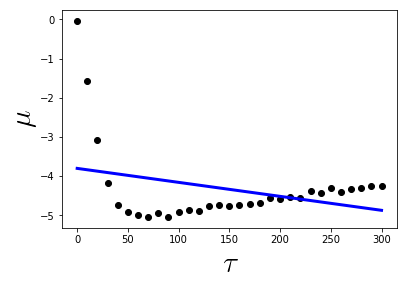

In [43]:
N = 100
tauA = 0
tauB = 0
x = [0] * 300 + [1] 
duration = 100000 * N
conv = N

taus = []
musOfTau = []

print('d, τ, µ')
for i in range(0, 31):
    x = x[:301]
    tauA = i * 10
    calculateProbability = calc.stepWithoutInterval(N, w = 0.99)
    simulate()
    mean = np.mean(x[100*conv:])
    print(d, ', ', tauA, ', ', mean)
    taus.append(tauA)
    musOfTau.append(mean)
    
print('\n')
    
taus = np.array(taus).reshape(-1,1)
regr.fit(taus, musOfTau)
mus_pred = regr.predict(taus)
print("Mean squared error: %.2f" % mean_squared_error(musOfTau, mus_pred))
print('Variance score: %.2f' % r2_score(musOfTau, mus_pred))
plt.scatter(taus, musOfTau,  color='black')
plt.plot(taus, mus_pred, color='blue', linewidth=3)
print('Line: ' + '%.2fx + %f' % (regr.coef_, regr.intercept_))
plt.ylabel(r'$\mu$', usetex=True, fontsize=30)
plt.xlabel(r'$\tau$', usetex=True, fontsize=30);

d, τ, µ
20 ,  310 ,  -4.219401656865533
20 ,  320 ,  -4.8681204759589365
20 ,  330 ,  -3.579380005688021
20 ,  340 ,  -3.2618599829359365
20 ,  350 ,  -3.9670094769772755
20 ,  360 ,  -3.243052816029211
20 ,  370 ,  -3.136732690525775
20 ,  380 ,  -4.589893670700269
20 ,  390 ,  -3.937734516197099
20 ,  400 ,  -2.2461078338730838
20 ,  410 ,  -3.0500087155163715
20 ,  420 ,  -4.186365262704012
20 ,  430 ,  -3.021146594985367
20 ,  440 ,  -3.1070632379519454
20 ,  450 ,  -3.0623480518527355
20 ,  460 ,  -4.222172273648866
20 ,  470 ,  -2.2536490490912926
20 ,  480 ,  -3.3627122686947826
20 ,  490 ,  -3.1633929963945286
20 ,  500 ,  -3.4994449592205576
20 ,  510 ,  -3.91867964514087
20 ,  520 ,  -3.2854285740497793
20 ,  530 ,  -5.030174035100595
20 ,  540 ,  -3.9636700580728617
20 ,  550 ,  -3.5108852212365025
20 ,  560 ,  -2.9754497665159034
20 ,  570 ,  -2.956917826441959
20 ,  580 ,  -3.2407959560004036
20 ,  590 ,  -3.2445849120650267
20 ,  600 ,  -4.313538407904515
20 ,  610 ,  -3.

20 ,  2780 ,  -2.0321648425243803
20 ,  2790 ,  -2.4070604856836177
20 ,  2800 ,  -1.507041219805323
20 ,  2810 ,  -1.6942229887799194
20 ,  2820 ,  -2.3123457582957956
20 ,  2830 ,  -1.2193099145879396
20 ,  2840 ,  -3.229410739351015
20 ,  2850 ,  -1.163356299483491
20 ,  2860 ,  -2.2285667103971525
20 ,  2870 ,  -1.9488445060137063
20 ,  2880 ,  -1.6339758350840818
20 ,  2890 ,  -1.2632177686443244
20 ,  2900 ,  -2.5893707397179844
20 ,  2910 ,  -1.9239640003302723
20 ,  2920 ,  -1.572536031779525
20 ,  2930 ,  -2.601122925477748
20 ,  2940 ,  -1.525499766057192
20 ,  2950 ,  -1.533398776158017
20 ,  2960 ,  -1.167163604003633
20 ,  2970 ,  -1.3935743708773314
20 ,  2980 ,  -1.770304859588444
20 ,  2990 ,  -1.2155668296621132
20 ,  3000 ,  -2.3411253107769654
20 ,  3010 ,  -1.7577086448748176
20 ,  3020 ,  -1.1166870028715332
20 ,  3030 ,  -1.140732653828864
20 ,  3040 ,  -1.9125787836808836
20 ,  3050 ,  -1.3285933156576546
20 ,  3060 ,  -1.4481793745011513
20 ,  3070 ,  -1.7345895

20 ,  5230 ,  -1.6847460115044817
20 ,  5240 ,  -1.6575536004256841
20 ,  5250 ,  -1.116943881248796
20 ,  5260 ,  -1.9194778029559363
20 ,  5270 ,  -1.5061421454849038
20 ,  5280 ,  -1.7650938982211173
20 ,  5290 ,  -2.0408895331235493
20 ,  5300 ,  -2.226594251428886
20 ,  5310 ,  -1.6946358290290915
20 ,  5320 ,  -2.1605581600168806
20 ,  5330 ,  -2.0706232052916946
20 ,  5340 ,  -2.492977128650196
20 ,  5350 ,  -1.3008963220520913
20 ,  5360 ,  -0.6813790699167898
20 ,  5370 ,  -1.2339611563196669
20 ,  5380 ,  -1.8939092301905487
20 ,  5390 ,  -2.9374959862753554
20 ,  5400 ,  -2.045100503665104
20 ,  5410 ,  -1.5492701901817414
20 ,  5420 ,  -0.36269392023926383
20 ,  5430 ,  -1.815625544719773
20 ,  5440 ,  -1.6879386427647454
20 ,  5450 ,  -1.5010321006229301
20 ,  5460 ,  -1.1330538251942643
20 ,  5470 ,  -2.447151860992101
20 ,  5480 ,  -1.8791845946367465
20 ,  5490 ,  -1.898331207970569
20 ,  5500 ,  -0.4486380858891203
20 ,  5510 ,  -0.8375244263814093
20 ,  5520 ,  -1.575

20 ,  7670 ,  -1.628040109723764
20 ,  7680 ,  -2.952404106384345
20 ,  7690 ,  -0.6442693186301043
20 ,  7700 ,  -1.6577095622975937
20 ,  7710 ,  -1.367859010467794
20 ,  7720 ,  -0.500087155163714
20 ,  7730 ,  -0.5283437766625995
20 ,  7740 ,  -1.808974229594224
20 ,  7750 ,  -1.083944183998312
20 ,  7760 ,  -0.6520123668590196
20 ,  7770 ,  -0.96930303391712
20 ,  7780 ,  -0.6083430427243787
20 ,  7790 ,  -2.276593792717498
20 ,  7800 ,  -1.3103366024164915
20 ,  7810 ,  -1.2069981009348538
20 ,  7820 ,  -1.7391308336620765
20 ,  7830 ,  -1.2110347611489802
20 ,  7840 ,  -0.5576554343538133
20 ,  7850 ,  -1.4403078870836048
20 ,  7860 ,  -1.2116035632700617
20 ,  7870 ,  -1.7280850634397849
20 ,  7880 ,  -1.2778598361482922
20 ,  7890 ,  -1.085402886212053
20 ,  7900 ,  -2.186576269942478
20 ,  7910 ,  -0.8819093402812819
20 ,  7920 ,  -1.025366739754681
20 ,  7930 ,  -1.022596122971349
20 ,  7940 ,  -0.5491234025375914
20 ,  7950 ,  -0.9545325272245209
20 ,  7960 ,  -1.6180310272

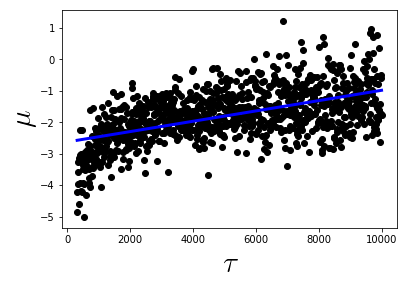

In [46]:
N = 100
tauA = 0
tauB = 0
x = [0] * 10000 + [1] 
duration = 1000 * N
conv = N

taus = []
musOfTau = []

print('d, τ, µ')
for i in range(31, 1001):
    x = x[:10001]
    tauA = i * 10
    calculateProbability = calc.stepWithoutInterval(N, w = 0.99)
    simulate()
    mean = np.mean(x[10*conv:])
    print(d, ', ', tauA, ', ', mean)
    taus.append(tauA)
    musOfTau.append(mean)
    
print('\n')
    
taus = np.array(taus).reshape(-1,1)
regr.fit(taus, musOfTau)
mus_pred = regr.predict(taus)
print("Mean squared error: %.2f" % mean_squared_error(musOfTau, mus_pred))
print('Variance score: %.2f' % r2_score(musOfTau, mus_pred))
plt.scatter(taus, musOfTau,  color='black')
plt.plot(taus, mus_pred, color='blue', linewidth=3)
print('Line: ' + '%.2fx + %f' % (regr.coef_, regr.intercept_))
plt.ylabel(r'$\mu$', usetex=True, fontsize=30)
plt.xlabel(r'$\tau$', usetex=True, fontsize=30);

In [48]:
print(regr.coef_)
print(-regr.intercept_/regr.coef_)

[0.00016411]
[16001.00687287]


d, τ, µ
20 ,  12000 ,  -2.2881147118852883
20 ,  12100 ,  -2.63989336010664
20 ,  12200 ,  -1.9934210065789935
20 ,  12300 ,  -2.399153600846399
20 ,  12400 ,  -1.891209108790891
20 ,  12500 ,  -2.504838495161505
20 ,  12600 ,  -2.111014888985111
20 ,  12700 ,  -2.223086776913223
20 ,  12800 ,  -2.222337777662222
20 ,  12900 ,  -1.9847730152269847
20 ,  13000 ,  -2.303033696966303
20 ,  13100 ,  -2.102333897666102
20 ,  13200 ,  -1.9944990055009946
20 ,  13300 ,  -2.2384237615762386
20 ,  13400 ,  -1.8753041246958753
20 ,  13500 ,  -2.3825306174693823
20 ,  13600 ,  -2.140793859206141
20 ,  13700 ,  -1.8595621404378595
20 ,  13800 ,  -1.6130823869176132
20 ,  13900 ,  -2.111086888913111
20 ,  14000 ,  -1.9476530523469477
20 ,  14100 ,  -2.217113782886217
20 ,  14200 ,  -1.8014581985418014
20 ,  14300 ,  -1.9421270578729422
20 ,  14400 ,  -2.086369913630086
20 ,  14500 ,  -2.2314397685602314
20 ,  14600 ,  -2.0526199473800526
20 ,  14700 ,  -2.313632686367314
20 ,  14800 ,  -1.972371027

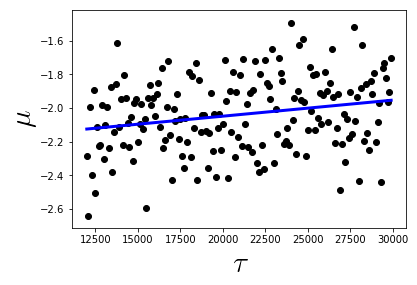

In [50]:
N = 100
tauA = 0
tauB = 0
x = [0] * 30000 + [1] 
duration = 10000 * N
conv = N

taus = []
musOfTau = []

print('d, τ, µ')
for i in range(120, 300):
    x = x[:30001]
    tauA = i * 100
    calculateProbability = calc.stepWithoutInterval(N, w = 0.99)
    simulate()
    mean = np.mean(x[300*conv:])
    print(d, ', ', tauA, ', ', mean)
    taus.append(tauA)
    musOfTau.append(mean)
    
print('\n')
    
taus = np.array(taus).reshape(-1,1)
regr.fit(taus, musOfTau)
mus_pred = regr.predict(taus)
print("Mean squared error: %.2f" % mean_squared_error(musOfTau, mus_pred))
print('Variance score: %.2f' % r2_score(musOfTau, mus_pred))
plt.scatter(taus, musOfTau,  color='black')
plt.plot(taus, mus_pred, color='blue', linewidth=3)
print('Line: ' + '%.2fx + %f' % (regr.coef_, regr.intercept_))
plt.ylabel(r'$\mu$', usetex=True, fontsize=30)
plt.xlabel(r'$\tau$', usetex=True, fontsize=30);